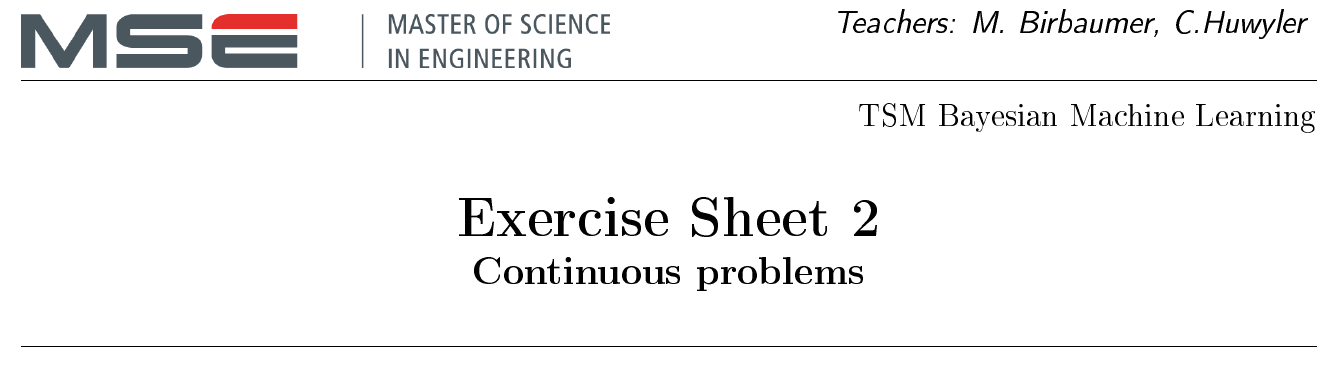

# Solutions

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import preliz as pz
from tqdm.auto import tqdm
plt.rcParams["figure.figsize"] = (15,3)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Exercise 1

### a)

$$E[\pi] = 0.4 = \frac{\alpha}{\alpha+\beta} \quad \Rightarrow \frac{\alpha}{\beta} = \frac{E[\pi]}{1-E[\pi]} = \frac23$$

Try out different values given the constraint above:

alpha = 10.0, beta = 15


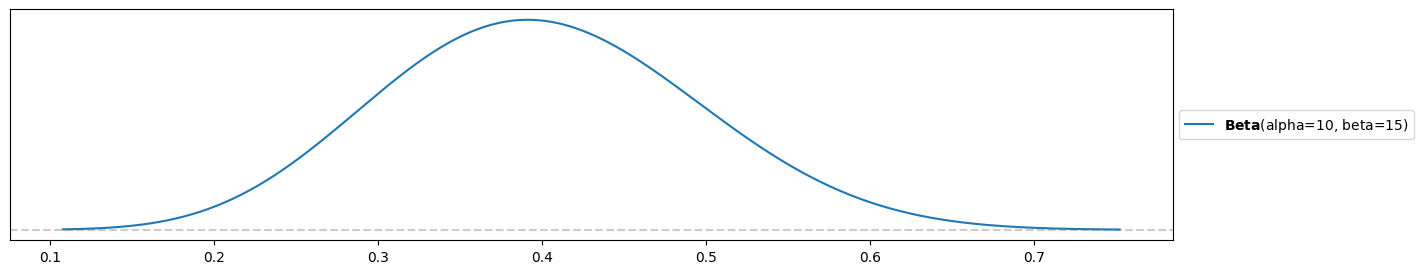

In [2]:
beta = 15
alpha = 2/3 * beta
pz.Beta(alpha, beta).plot_pdf()
print( "alpha = {}, beta = {}".format( alpha, beta ) )

However Beta(6,9) or Beta(12,18) could also be reasonable!

### b)

$\displaystyle{\frac{\alpha}{\beta} = \frac{E[\pi]}{1-E[\pi]} = 0.8/0.2 = 4} \quad \Rightarrow \alpha = 4\beta$

$\text{Var}[\pi] = \displaystyle{\frac{\alpha\beta}{(\alpha+\beta)^2 (\alpha + \beta + 1)} = \frac{4\beta^2}{(5\beta)^2 \; (5\beta + 1)} = \frac{4}{25 \; (5\beta + 1)} = 0.005} \; \Rightarrow 5\beta + 1 = \frac{4}{25 \cdot 0.005} \; \Rightarrow \beta = \frac15 \left(\frac{4}{25 \cdot 0.005}-1\right) = 6.2$

In [3]:
beta = 1/5 * (4/(25*0.005)-1)
beta

6.2

In [4]:
alpha = 4*beta
alpha

24.8

<Axes: >

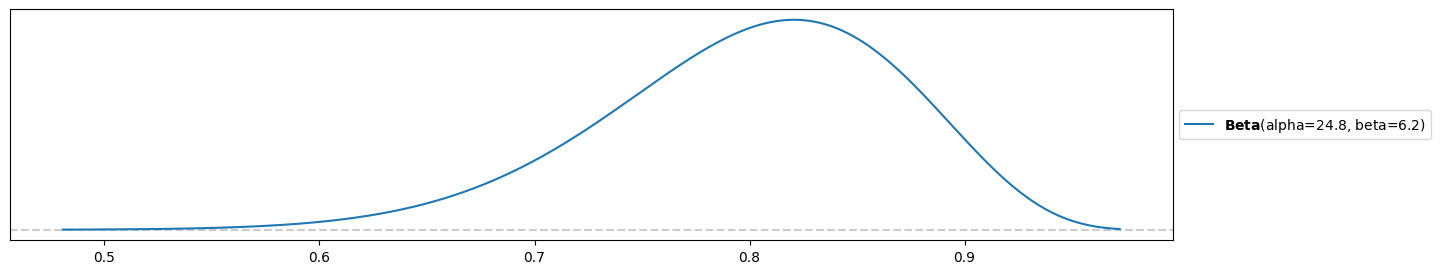

In [5]:
pz.Beta(alpha, beta).plot_pdf()

### c)

Using the same formula:

In [6]:
beta = 1/5 * (4/(25*0.05)-1)
beta

0.44000000000000006

In [7]:
alpha = 4*beta
alpha

1.7600000000000002

<Axes: >

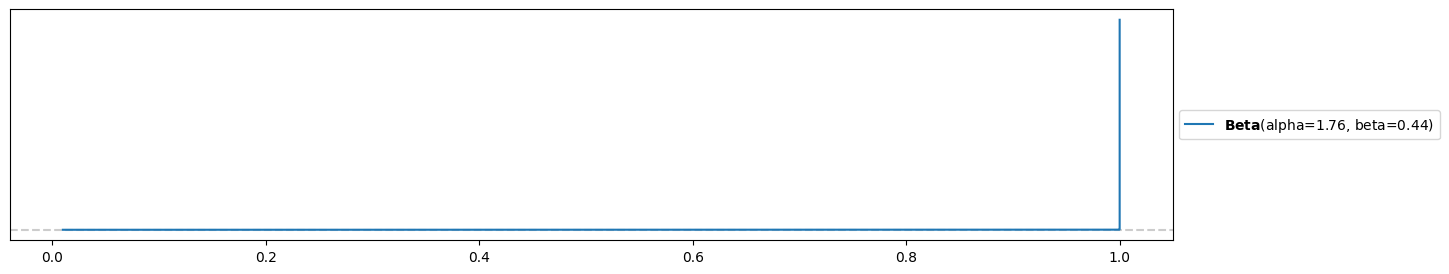

In [8]:
pz.Beta(alpha, beta).plot_pdf()

In [9]:
pz.Beta(alpha, beta).mean(), pz.Beta(alpha, beta).var()

(0.8, 0.05)

Oops! This beta distribution has the correct expectation and variance, but does not model what we want. We would rather have a distribution centered around 0.8. This is the price of reducing all possible prior to a two-dimensional family (parameterized by $\alpha$ and $\beta$). An alternative might be a truncated normal distribution:

<Axes: >

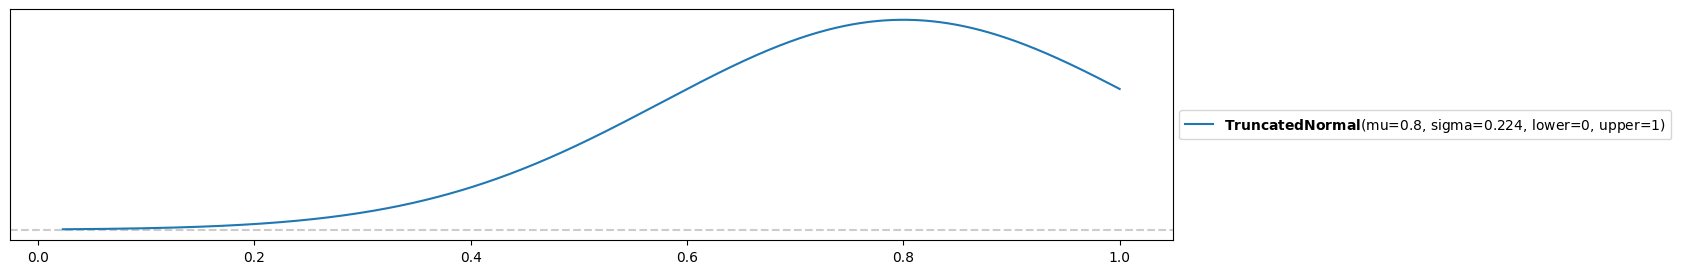

In [10]:
pz.TruncatedNormal(mu=0.8, sigma=np.sqrt(0.05), lower=0, upper=1).plot_pdf()

However it's hard to say whether this is what we want and depends on the application. You might try with more bounded distributions that are listed [here](https://reference.wolfram.com/language/guide/BoundedDomainDistributions.html).

### d)

Ratio through expectation:

$\frac{\alpha}{\beta} = \frac{E[\pi]}{1-E[\pi]} = \frac{0.9}{0.1} = 9$.

Tuning by hand, trying until the range is more or less correct:

<Axes: >

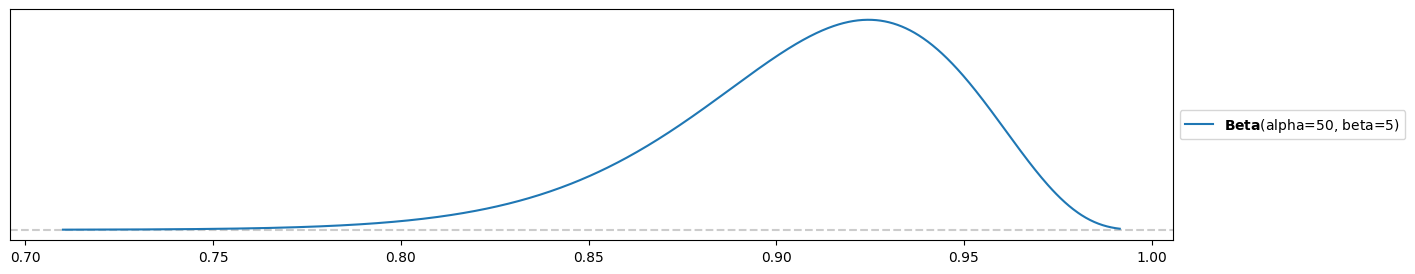

In [11]:
beta = 5 # tried 1, 2, 3, 4, 5
alpha = 10*beta
pz.Beta( alpha, beta ).plot_pdf()

Have reached the desired prior only approximately using the beta distribution! It could allow for a bit more room towards 100%.

### e)

This calls for a beta distribution with $\alpha, \beta < 1$ !

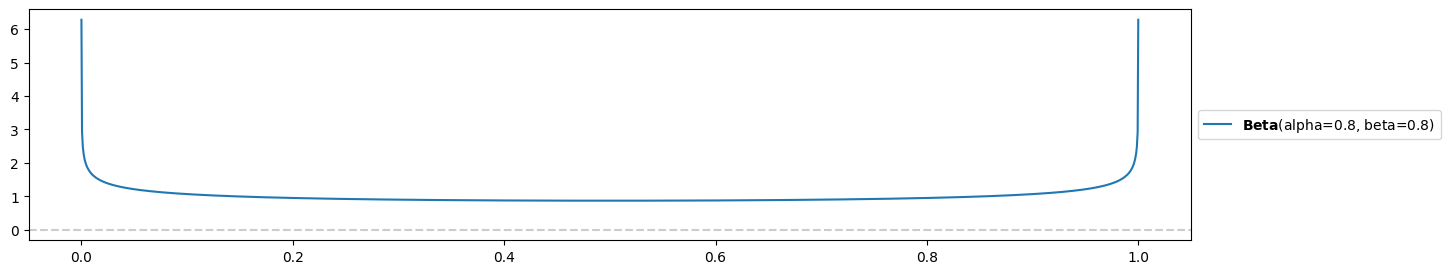

In [12]:
pz.Beta( alpha=0.8, beta=0.8 ).plot_pdf()
plt.yticks(np.arange(0,7,1));

## Exercise 2

### a)

Use beta-binomial family!

Prior for Heidi by iteratively trying a few values for $\alpha$ and $\beta$ (might be slightly different from yours):

<Axes: >

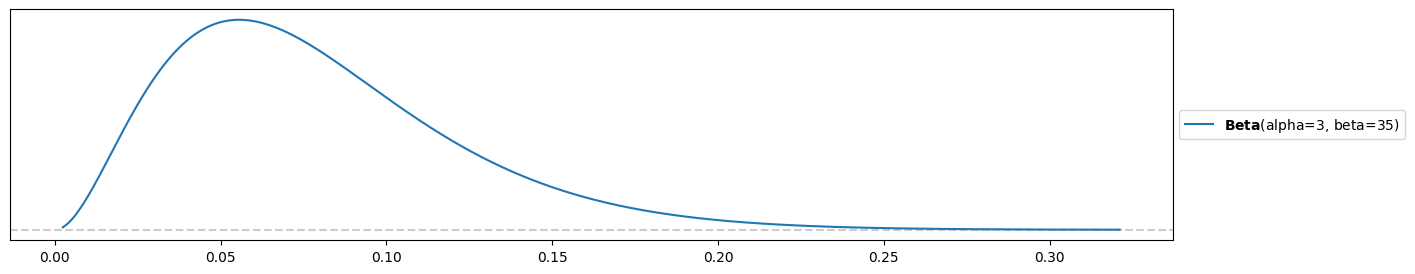

In [13]:
alpha_heidi = 3
beta_heidi = 35
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()

Prior for Peter (again, you might differ):

<Axes: >

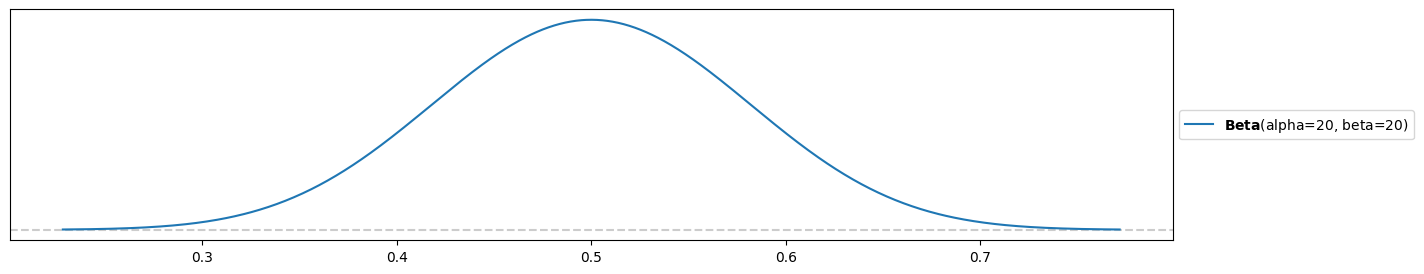

In [14]:
alpha_peter = 20
beta_peter = 20
pz.Beta(alpha=alpha_peter, beta=beta_peter).plot_pdf()

### b)

Experiment (dinner):

In [15]:
n = 6
k = 1

#### Heidi's posterior

Text(0.5, 1.0, "Evolution of Heidi's opinion (blue: prior, orange: posterior)")

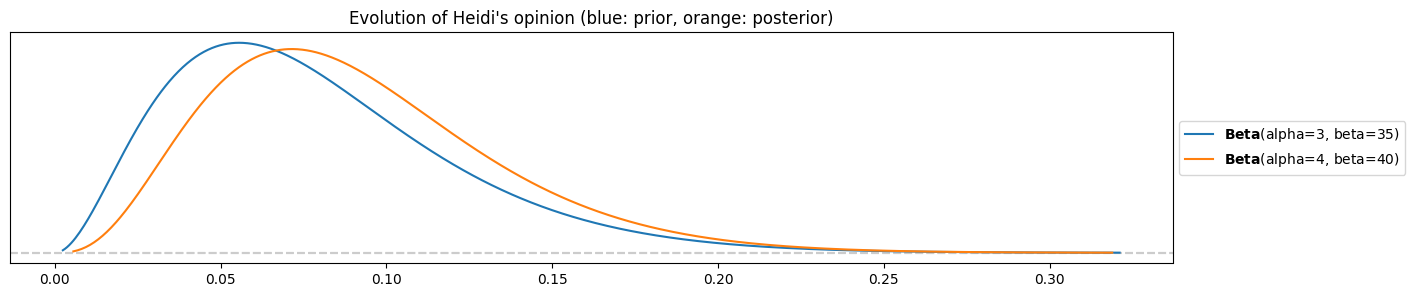

In [16]:
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()
pz.Beta(alpha=alpha_heidi+k, beta=beta_heidi+n-k).plot_pdf()
plt.title("Evolution of Heidi's opinion (blue: prior, orange: posterior)")

The change is almost not visible! Compare prior and posterior means:

In [17]:
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).mean(), pz.Beta(alpha=alpha_heidi+k, beta=beta_heidi+n-k).mean()

(0.07894736842105263, 0.09090909090909091)

A marginal move towards higher percentages from 8% to 9%.

#### Peter's posterior

Text(0.5, 1.0, "Evolution of Peter's opinion (blue: prior, orange: posterior)")

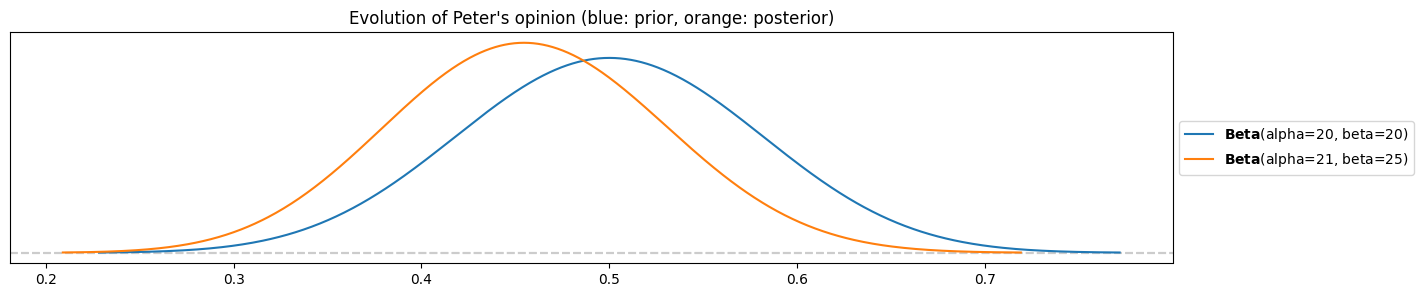

In [18]:
pz.Beta(alpha=alpha_peter, beta=beta_peter).plot_pdf()
pz.Beta(alpha=alpha_peter+k, beta=beta_peter+n-k).plot_pdf()
plt.title("Evolution of Peter's opinion (blue: prior, orange: posterior)")

The move is a bit stronger towards lower ratios. Means:

In [19]:
pz.Beta(alpha=alpha_peter, beta=beta_peter).mean(), pz.Beta(alpha=alpha_peter+k, beta=beta_peter+n-k).mean()

(0.5, 0.45652173913043476)

His mean belief went from 50% to 46%.

### c)

Text(0.5, 1.0, "Evolution of Heidi's opinion if all 6 people would have mixed (blue: prior, orange: posterior)")

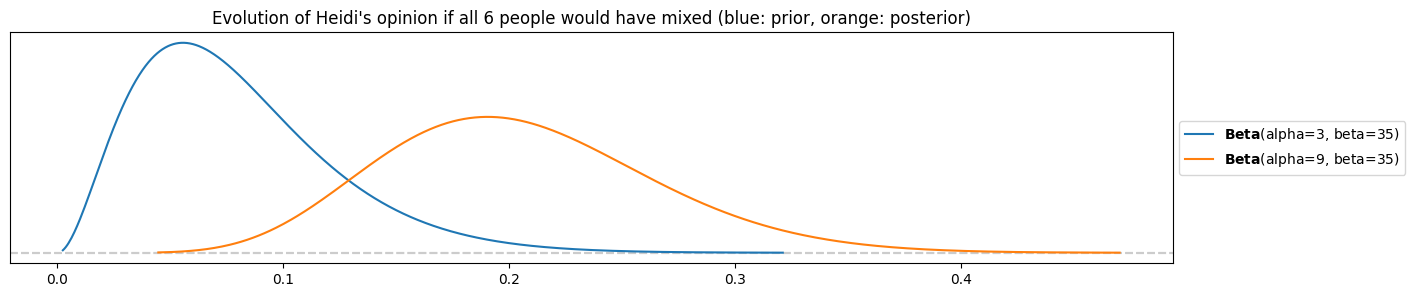

In [20]:
k = 6
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()
pz.Beta(alpha=alpha_heidi+k, beta=beta_heidi+n-k).plot_pdf()
plt.title("Evolution of Heidi's opinion if all 6 people would have mixed (blue: prior, orange: posterior)")

Heidi would move to a mode/average of almost 20%! This is a big change for her, however she is still far away from being convinced by Peter.

What number of people who all mix their apple puré would be necessary to put her posterior mean up to 50%?

With preliz:

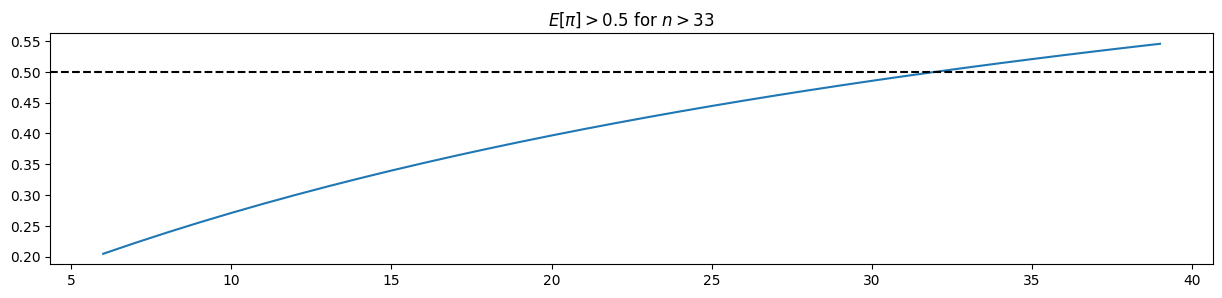

In [21]:
n_range = np.arange(6, 40)
posterior_means = np.array( [pz.Beta(alpha=alpha_heidi+n, beta=beta_heidi+n-n).mean() for n in n_range] ) # n=k
plt.plot( n_range, posterior_means )
plt.axhline( 0.5, c="black", ls="--" )
plt.title("$E[\pi] > 0.5$ for $n > {}$".format(6+np.argmax(posterior_means > 0.5)));

with pandas:

In [22]:
df = pd.DataFrame({'n': n_range, 'posterior_mean': posterior_means})
df[df.posterior_mean > 0.5] 

,n,posterior_mean
27,33,0.507042
28,34,0.513889
29,35,0.520548
30,36,0.527027
31,37,0.533333
32,38,0.539474
33,39,0.545455


To convince Heidi, 33 people would have needed to attend the dinner and mix their apple puré with the rest!

## Exercise 3

### a)

$$
\begin{eqnarray}
E[\pi] &=& \int_0^1 \pi \; p(\pi; \alpha, \beta) \; \text{d}\pi = \int_0^1 \pi \;  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\; \Gamma(\beta)} \; \pi^{\alpha-1} \; (1-\pi)^{\beta-1} \; \text{d}\pi\\
&=& \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\; \Gamma(\beta)} \; \int_0^1 \pi^{\alpha} \; (1-\pi)^{\beta-1} \; \text{d}\pi\\
&=& \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\; \Gamma(\beta)} \; \frac{\Gamma(\alpha+1) \; \Gamma(\beta)}{\Gamma(\alpha+\beta+1)} = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)} \; \frac{\Gamma(\alpha+1)}{\Gamma(\alpha+\beta+1)}\\
&=& \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)} \; \frac{\alpha \; \Gamma(\alpha)}{(\alpha+\beta) \; \Gamma(\alpha+\beta)}\\
&=& \frac{\alpha}{\alpha+\beta}
\end{eqnarray}
$$

### b)

$$
\frac{\alpha+k}{\alpha+\beta+n} = w \; \frac{\alpha}{\alpha+\beta} + (1-w) \; \frac{k}{n}
$$

$$
\Rightarrow \frac{\alpha+k}{\alpha+\beta+n} = w \; \left( \frac{\alpha}{\alpha+\beta} - \frac{k}{n} \right) + \frac{k}{n}
$$

$$
w = \frac{\frac{\alpha+k}{\alpha+\beta+n} - \frac{k}{n}}{\frac{\alpha}{\alpha+\beta} - \frac{k}{n}} = \frac{\frac{\alpha n + k n - \alpha k - \beta k - nk}{n(\alpha+\beta+n)}}{\frac{\alpha n - k\alpha -k\beta}{(\alpha+\beta) n}} = \frac{\alpha n - \alpha k - \beta k}{\alpha+\beta+n} \; \frac{\alpha+\beta}{\alpha n - \alpha k - \beta k} = \frac{\alpha+\beta}{\alpha+\beta+n}
$$

$$
1-w = 1 - \frac{\alpha+\beta}{\alpha+\beta+n} = \frac{\alpha+\beta+n}{\alpha+\beta+n} - \frac{\alpha+\beta}{\alpha+\beta+n} = \frac{n}{\alpha+\beta+n}
$$

### c)

* $\displaystyle{\lim_{n\to 0}} \; E[\pi|Y=k] = E[\pi]\quad$  (prior dominates the posterior mean)
* $\displaystyle{\lim_{n\to \infty}} \; E[\pi|Y=k] = \bar{y}\quad$  (empirical mean dominates the posterior mean)

large $n$ dominate less if $\alpha$ and $\beta$ (and consequently $\alpha+\beta$ are also large. This is equivalent to a strong prior (the larger $\alpha$ and $\beta$, the smaller the variance). It makes sense that it takes more data to convince a strong prior than it takes to convince a weak prior (with small values for $\alpha$ and $\beta$).

## Exercise 4

### a)

Simulation:

In [23]:
n1 = 10; n2 = 30; n3 = 100
pi_true = 0.7
k1 = np.sum( np.random.choice([0,1], p=[1-pi_true, pi_true], size=n1) )
k2 = np.sum( np.random.choice([0,1], p=[1-pi_true, pi_true], size=n2) )
k3 = np.sum( np.random.choice([0,1], p=[1-pi_true, pi_true], size=n3) )

Frequentist estimate:

In [24]:
k1/n1, k2/n2, k3/n3

(0.8, 0.7, 0.68)

### b)

Uniform, uninformed prior:

<Axes: >

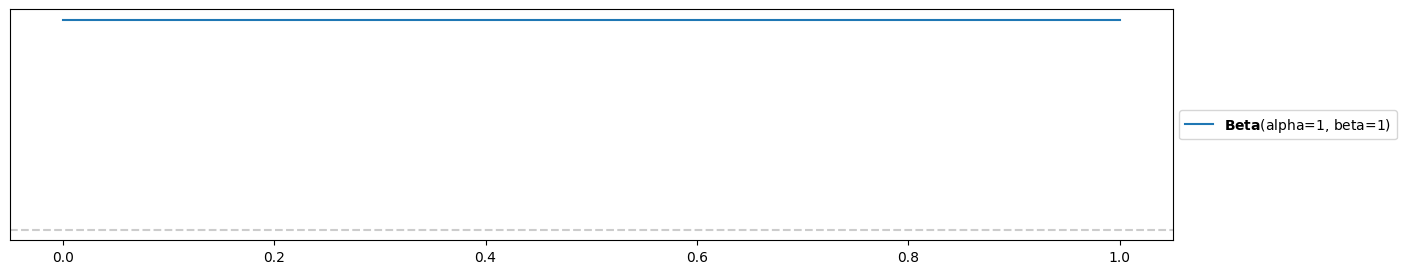

In [25]:
alpha1 = beta1 = 1
pz.Beta(alpha1, beta1).plot_pdf()

Weakly-informed prior:

<Axes: >

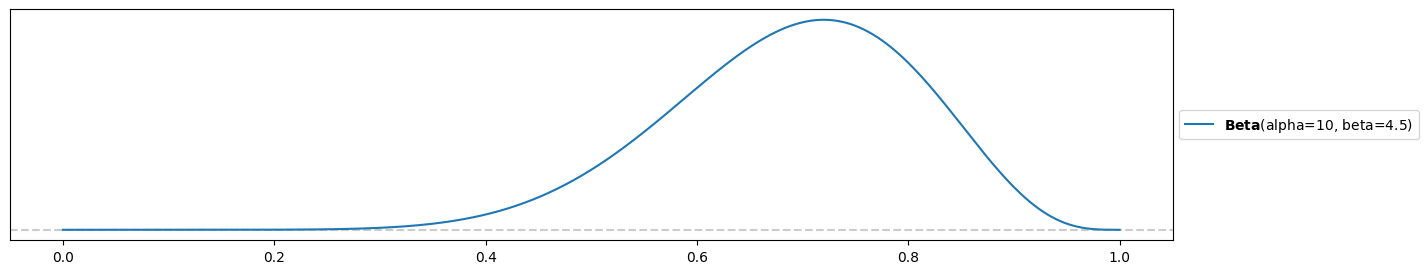

In [26]:
alpha2 = 10
beta2 = 4.5
pz.Beta(alpha2, beta2).plot_pdf( support="full" )

Strongly-informed prior:

<Axes: >

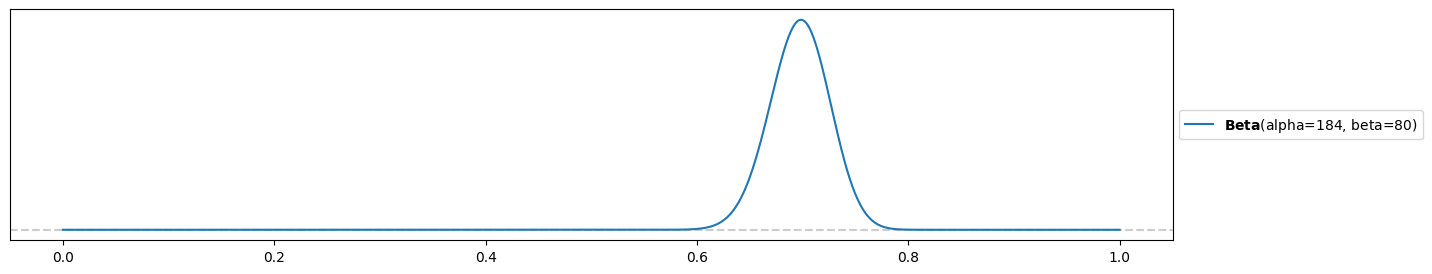

In [27]:
alpha3 = 184
beta3 = 80
pz.Beta(alpha3, beta3).plot_pdf( support="full" )

Strongly-informed, wrong prior:

<Axes: >

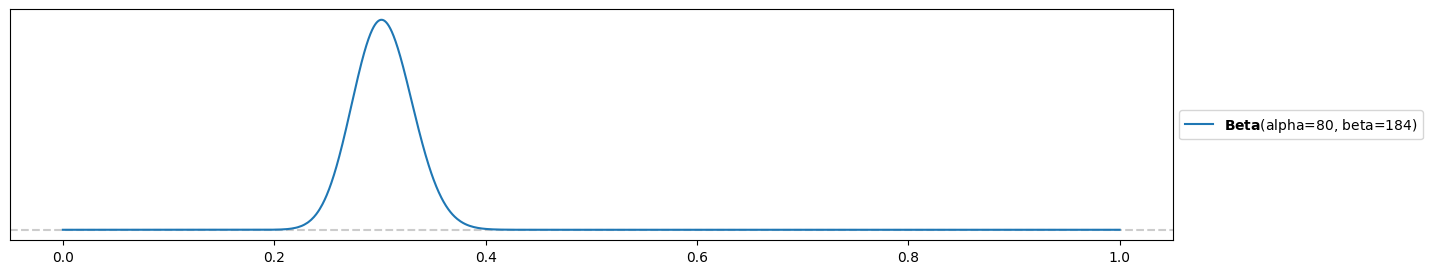

In [28]:
alpha4 = 80
beta4 = 184
pz.Beta(alpha4, beta4).plot_pdf( support="full" )

### c)

Use function from tongue rolling notebook:

In [29]:
from scipy import stats

def plot_beta_binomial( alpha, beta, n, k, figsize=(13,3) ):
    # create figure
    plt.figure( figsize=figsize )
    
    # numeric evaluation range for pi
    pi_range = np.linspace(0, 1, 1000)
    
    # prior
    prior = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]
    plt.plot( pi_range, prior, alpha=0.5, label="prior", c="orange" )
    plt.fill_between( pi_range, prior, alpha=0.3, color="orange" )

    # scaled likelihood
    likelihood = [stats.binom.pmf(n=n, k=k, p=pi) for pi in pi_range]
    likelihood /= np.sum( likelihood ) * (pi_range[1]-pi_range[0])
    plt.plot( pi_range, likelihood, alpha=0.5, label="(scaled) likelihood", c="blue" )
    plt.fill_between( pi_range, likelihood, alpha=0.3, color="blue" )

    # posterior
    posterior = [stats.beta.pdf(pi, a=alpha+k, b=beta+n-k) for pi in pi_range]
    plt.plot( pi_range, posterior, alpha=0.5, label="posterior", color="darkgreen" )
    plt.fill_between( pi_range, posterior, alpha=0.3, color="darkgreen" )
    
    # enable legend and set descriptive title
    plt.legend( fontsize=14 )
    plt.title( "$\\alpha = {}, \; \\beta={}, \; n={}, \; k={}$".format(alpha, beta, n, k) )

#### For uniform prior:

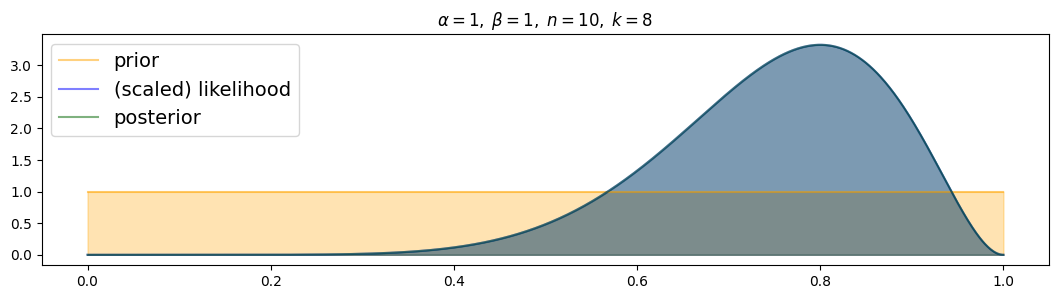

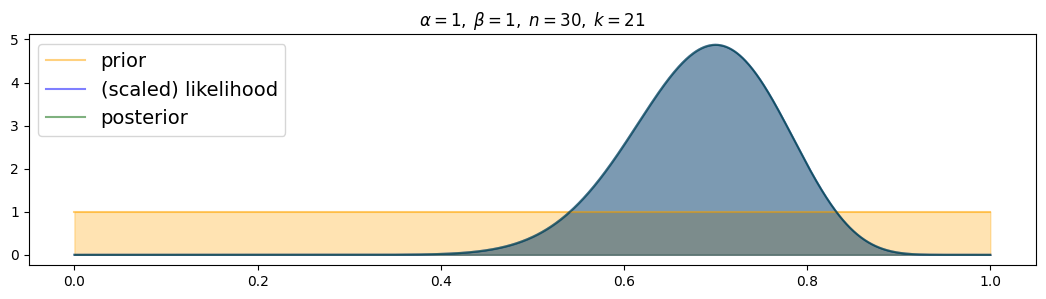

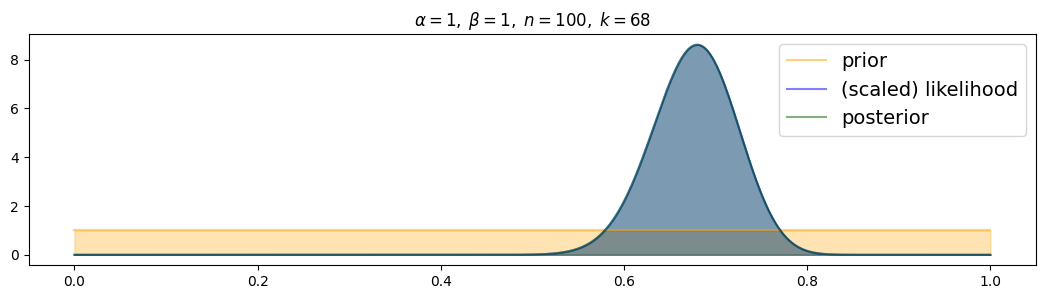

In [30]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha1, beta1, n, k )

The more data, the more narrow the posterior! (and the closer to the true value)

#### For weakly-informed prior:

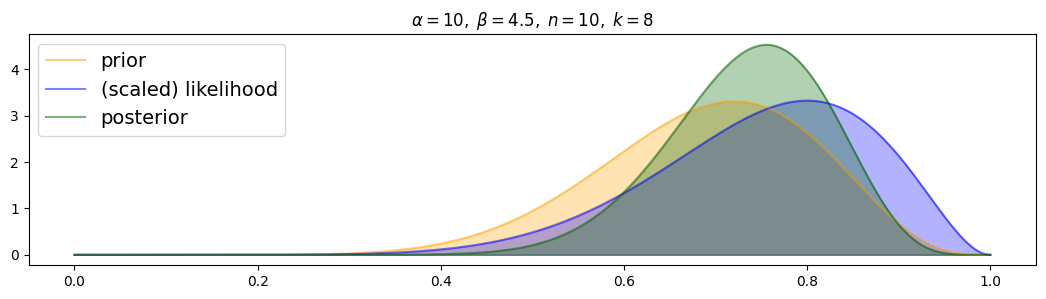

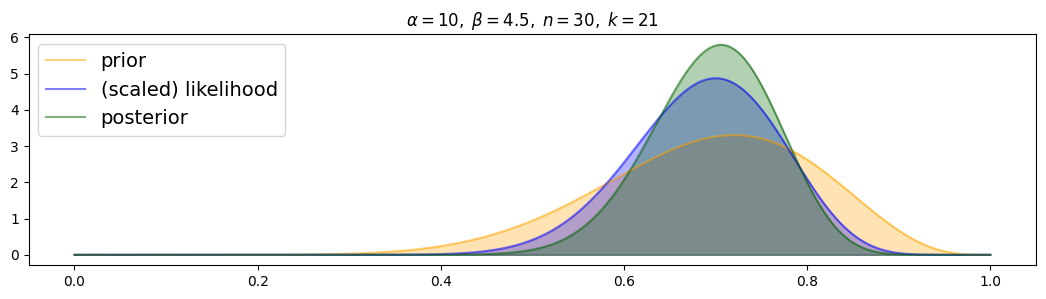

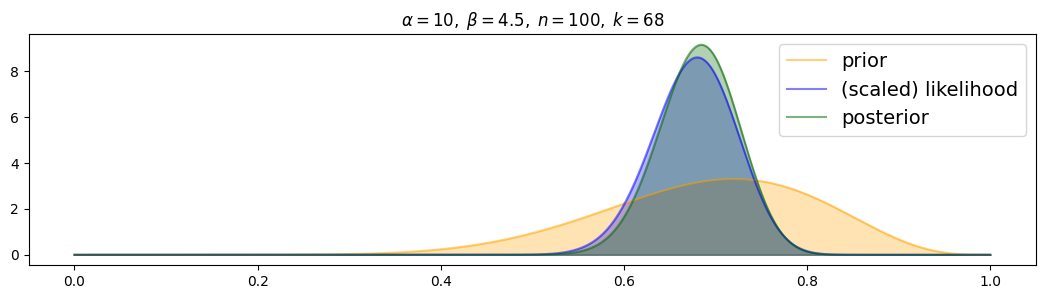

In [31]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha2, beta2, n, k )

The posterior is always distributed as a compromise between prior and (scaled) likelihood. For more data, the posterior is drawn more to the scaled likelihood and narrower.

#### For strongly-informed prior:

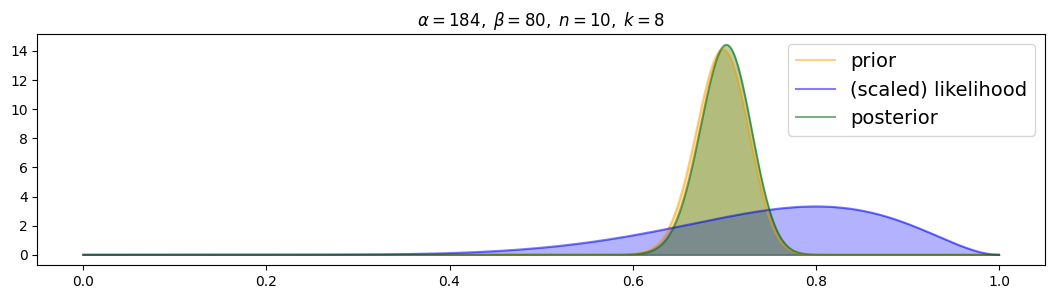

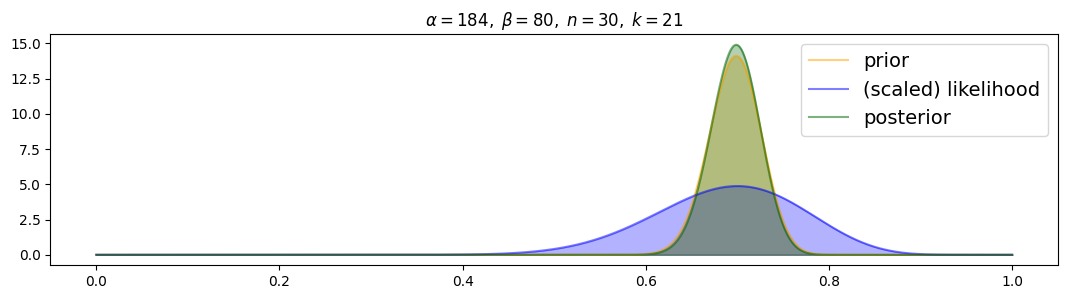

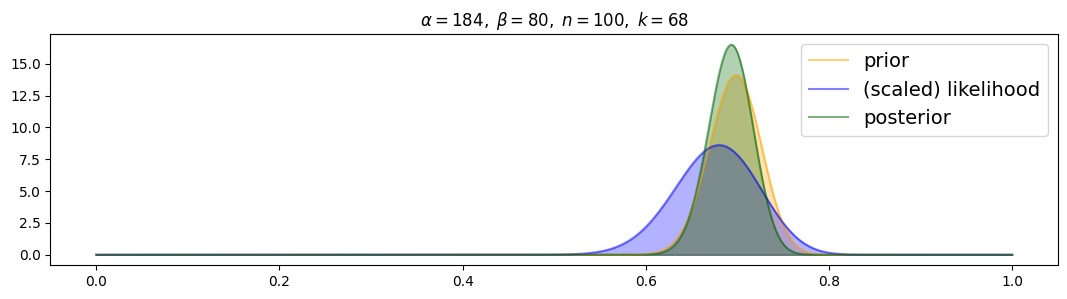

In [32]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha3, beta3, n, k )

Posterior is drawn to prior from the beginning! Even with 100 samples the prior still dominates the likelihood.

#### For wrong, strongly-informed prior:

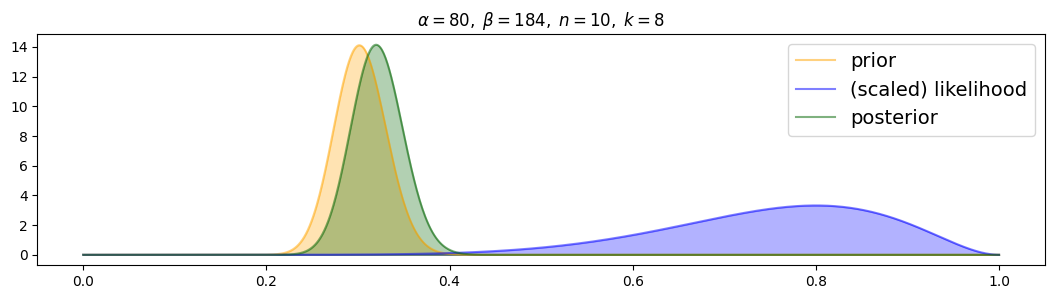

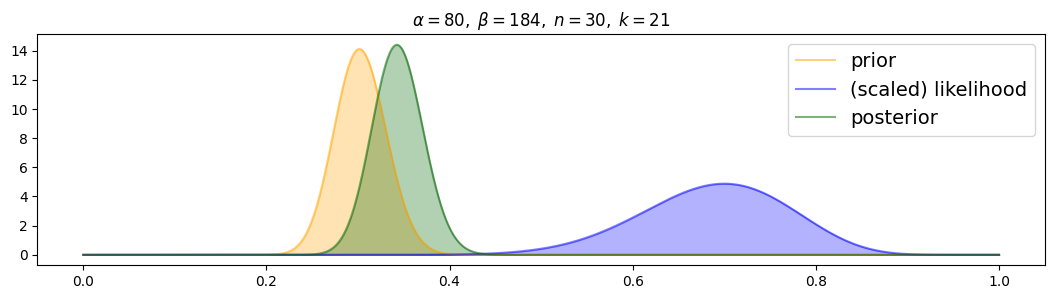

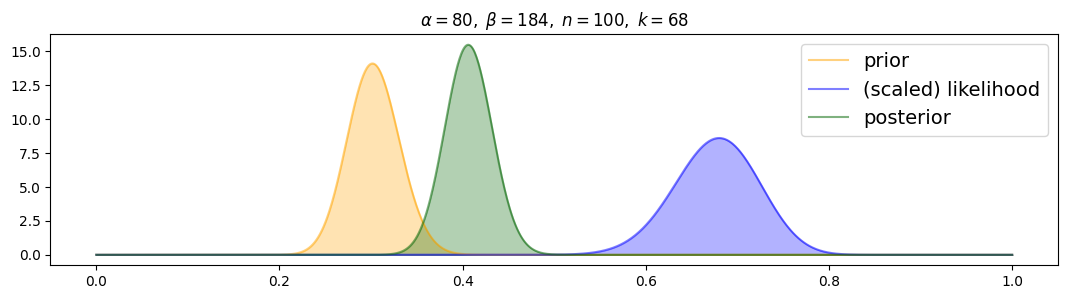

In [33]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha4, beta4, n, k )

The wrong prior strongly attracts the posterior, with more data it is only slowly attracted towards the likelihood.

## Exercise 5

### a)

Try out different values using preliz (note that they use $\alpha$ instead of $s$ and $\beta$ instead of $r$):

(-0.5, 8.0)

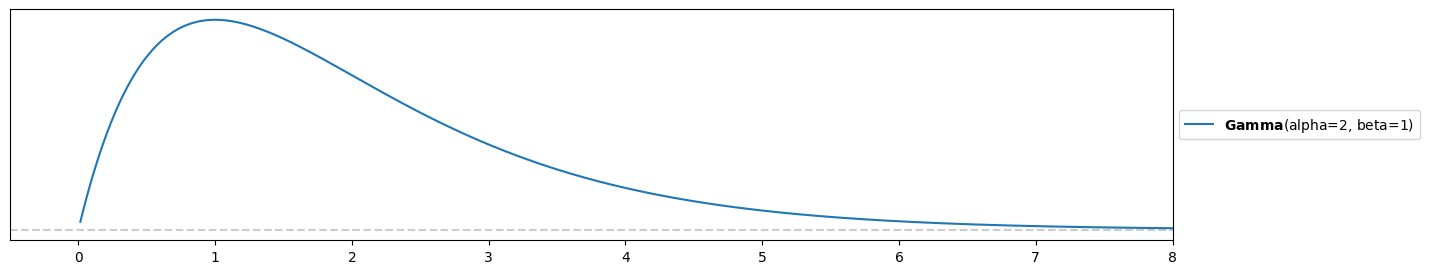

In [34]:
s = 2
r = 1
pz.Gamma(s, r).plot_pdf()
plt.xlim(-0.5,8)

(your prior should look similar but your values for $s$ and $r$ might differ!)

### b)

In [35]:
y = [0,2,5,2,1,0,1,1,2]

Update rule: $\text{Gamma}(s, r) \to \text{Gamma}(s+\sum_i y_i, r+n)$

Plot prior and posterior:

Text(0.5, 1.0, 'blue: prior, orange: posterior')

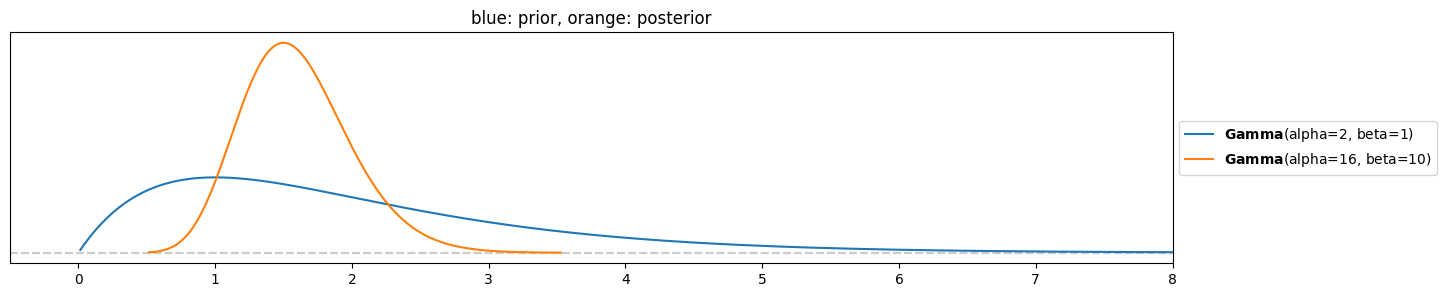

In [36]:
pz.Gamma(s, r).plot_pdf()
pz.Gamma(s+np.sum(y), r+len(y)).plot_pdf()
plt.xlim(-0.5,8)
plt.title("blue: prior, orange: posterior")

In [37]:
pz.Gamma(s+np.sum(y), r+len(y)).summary()

Gamma(mean=1.6, median=1.57, std=0.4, lower=0.88, upper=2.36)

### c)

Let's demonstrate this!

Draw samples from prior:

In [38]:
N = 10000
lmbd_vals = pz.Gamma(s, r).rvs(N)
lmbd_vals.shape

(10000,)

Draw 9 Poisson samples for each lambda and sort them, as order does not matter:

In [39]:
samples = [sorted(list(pz.Poisson(mu=lmbd).rvs(9))) for lmbd in lmbd_vals]
samples[:10]

[[1, 2, 2, 2, 3, 3, 5, 6, 6],
 [1, 3, 3, 3, 5, 5, 5, 7, 7],
 [0, 1, 2, 2, 2, 2, 3, 4, 6],
 [0, 0, 0, 1, 1, 1, 1, 2, 3],
 [1, 2, 2, 2, 3, 4, 4, 5, 5],
 [0, 0, 1, 1, 2, 2, 2, 2, 2],
 [0, 1, 2, 2, 2, 3, 3, 3, 3],
 [0, 1, 1, 2, 2, 2, 2, 4, 5],
 [0, 0, 0, 0, 0, 0, 0, 1, 2],
 [0, 0, 0, 1, 1, 1, 1, 2, 3]]

In [40]:
match = [s == sorted(list(y)) for s in samples]
lmbd_vals[match]

array([1.23681577, 1.87586495, 2.01457517, 2.06743204, 1.83493611,
       1.10621502, 1.60273255, 1.07602268, 1.89887354])

This is a very small number of samples to estimate a mean, a standard deviation or even a probability distribution!

In [41]:
np.mean( lmbd_vals[match] ), np.std( lmbd_vals[match] )

(1.6348297588666443, 0.3727309421232923)

Interestingly the values are nontheless not too far away. Nevertheless, this probably gets much worse if we collect more data..

**Conclusion:** Need a much more effective sampler! (MCMC - next week)

## Exercise 6

### a)

Compute formulas for $s$ and $r$ given $\mu$ and $\sigma^2$:

$\mu = \frac{s}{r} \quad \Rightarrow s = r \; \mu$

$\sigma^2 = \frac{s}{r^2} = \frac{\mu}{r} \quad \Rightarrow r = \frac{\mu}{\sigma^2}$

### b)

Compute $\mu$ and $\sigma^2$ from data:

In [42]:
mu = np.mean( y )
var = np.var( y )

In [43]:
r_emp = mu/var
s_emp = r_emp * mu
r_emp, s_emp

(0.7682926829268291, 1.195121951219512)

Compare priors:

<Axes: >

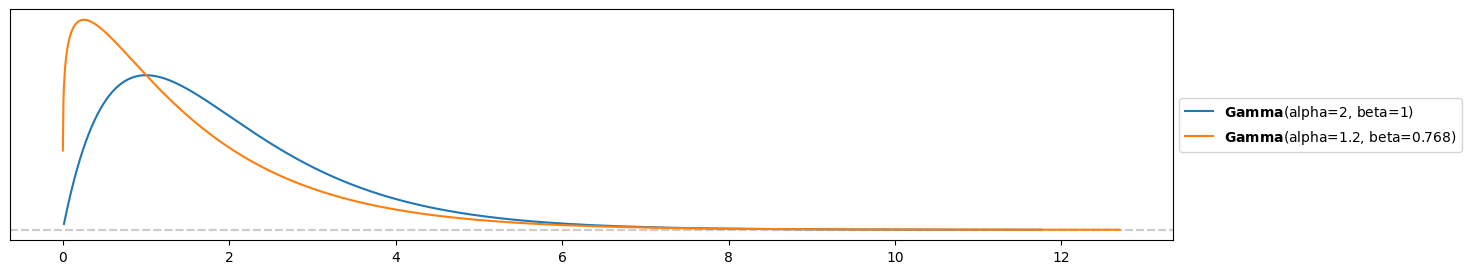

In [44]:
pz.Gamma( s, r ).plot_pdf()
pz.Gamma( s_emp, r_emp ).plot_pdf()

The empirical prior is a bit more right-skewed and concentrated on lower numbers of absences.

### c)

Compare posteriors:

<Axes: >

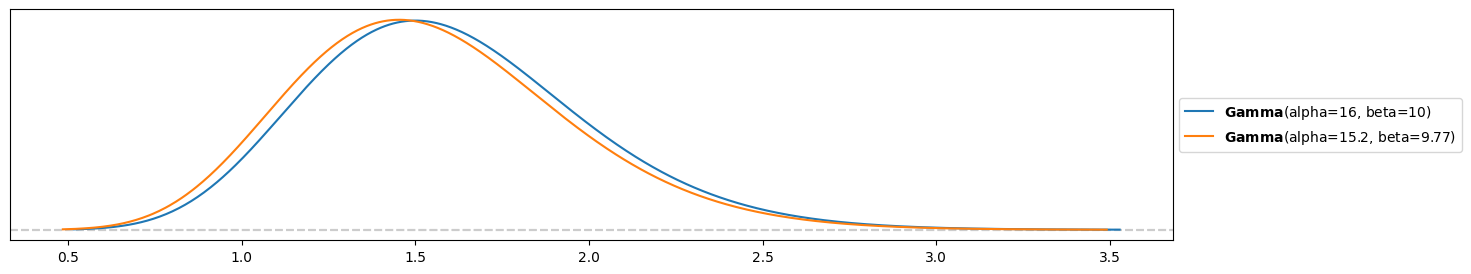

In [45]:
pz.Gamma( s+np.sum(y), r+len(y) ).plot_pdf()
pz.Gamma( s_emp+np.sum(y), r_emp+len(y) ).plot_pdf()

The posteriors are however very similar, maybe empirical Bayes has a point.. Given enough data points (10 in this case), the posterior is already quite robust against **small** changes in the prior. This would of course be different, if the elicited prior from the previous exercise and the empirical Bayes prior from this exercise would differ significantly!